In [ ]:
import pandas as pd
file_path = "/content/pmksy-mipms-physical-and-financial-report.csv"  # Update if needed
df = pd.read_csv(file_path)

In [ ]:
df_cleaned = df.drop_duplicates()

In [ ]:
df_cleaned.columns = df_cleaned.columns.str.strip()

In [ ]:
num_cols = df_cleaned.select_dtypes(include=['float64', 'int64']).columns
df_cleaned[num_cols] = df_cleaned[num_cols].fillna(0)

In [ ]:
if 'month' in df_cleaned.columns:
    df_cleaned['month'] = pd.to_datetime(df_cleaned['month'], errors='coerce')

In [ ]:
str_cols = df_cleaned.select_dtypes(include='object').columns
df_cleaned[str_cols] = df_cleaned[str_cols].apply(lambda x: x.str.strip().str.lower())

In [ ]:
df_cleaned.to_csv("pmksy_cleaned.csv", index=False)
print(df_cleaned.head())

   id fin_year      month                   state_name  state_code  \
0   0  2015-16 2015-04-01  andaman and nicobar islands          35   
1   1  2015-16 2015-04-01  andaman and nicobar islands          35   
2   2  2015-16 2015-04-01               andhra pradesh          28   
3   3  2015-16 2015-04-01               andhra pradesh          28   
4   4  2015-16 2015-04-01               andhra pradesh          28   

              district_name  district_code  fin_target_drip  \
0  north and middle andaman            632           242.30   
1            south andamans            602           131.34   
2                 anantapur            502           385.72   
3                  chittoor            503           821.82   
4             east godavari            505           548.38   

   fin_target_sprinkler  total_fin_target  ...  phy_target_drip  \
0                 10.09            252.39  ...          1086.89   
1                  5.47            136.81  ...           589.53   

In [ ]:
df = pd.read_csv("/content/pmksy_cleaned.csv")

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.columns = df.columns.str.strip()

In [ ]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[num_cols] = df[num_cols].fillna(0)

In [ ]:
if 'month' in df.columns:
    df['month'] = pd.to_datetime(df['month'], errors='coerce')

In [ ]:
str_cols = df.select_dtypes(include='object').columns
df[str_cols] = df[str_cols].apply(lambda x: x.str.strip().str.lower())

In [ ]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54383 entries, 0 to 54382
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   id                                 54383 non-null  int64         
 1   fin_year                           54383 non-null  object        
 2   month                              54383 non-null  datetime64[ns]
 3   state_name                         54383 non-null  object        
 4   state_code                         54383 non-null  int64         
 5   district_name                      54383 non-null  object        
 6   district_code                      54383 non-null  int64         
 7   fin_target_drip                    54383 non-null  float64       
 8   fin_target_sprinkler               54383 non-null  float64       
 9   total_fin_target                   54383 non-null  float64       
 10  fin_achivement_drip               

/tmp/ipython-input-5-3966575173.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_counts.index, y=state_counts.values, palette="Blues_d")


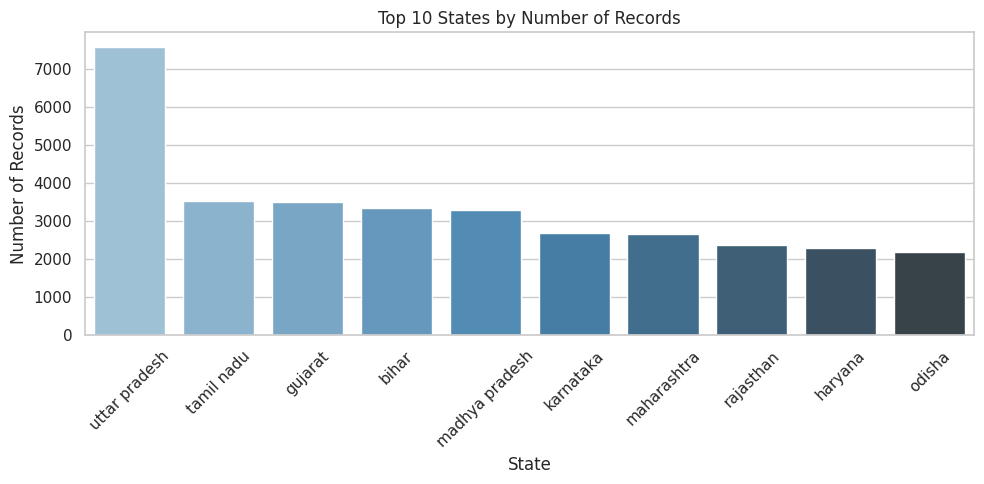

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
state_counts = df['state_name'].value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=state_counts.index, y=state_counts.values, palette="Blues_d")
plt.title("Top 10 States by Number of Records")
plt.xlabel("State")
plt.ylabel("Number of Records")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

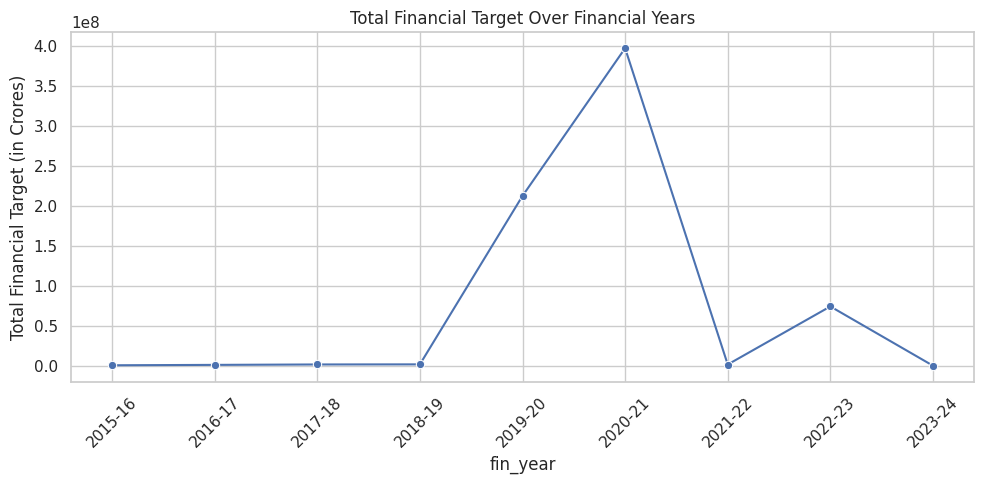

In [ ]:
yearly_fin = df.groupby('fin_year')['total_fin_target'].sum().reset_index()
plt.figure(figsize=(10, 5))
sns.lineplot(data=yearly_fin, x='fin_year', y='total_fin_target', marker='o')
plt.title("Total Financial Target Over Financial Years")
plt.ylabel("Total Financial Target (in Crores)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

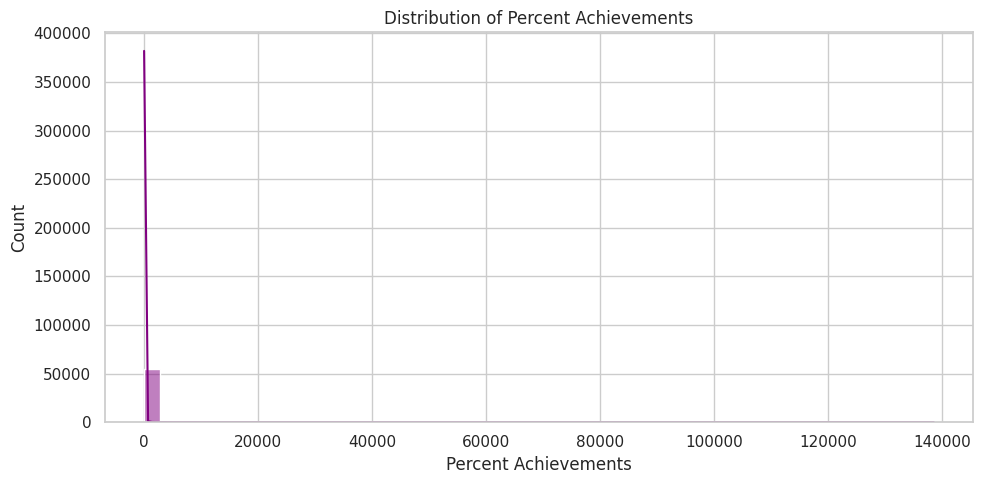

In [ ]:
# Histogram of percent achievements
plt.figure(figsize=(10, 5))
sns.histplot(df['percnt_achievements'], bins=50, kde=True, color='purple')
plt.title("Distribution of Percent Achievements")
plt.xlabel("Percent Achievements")
plt.tight_layout()
plt.show()

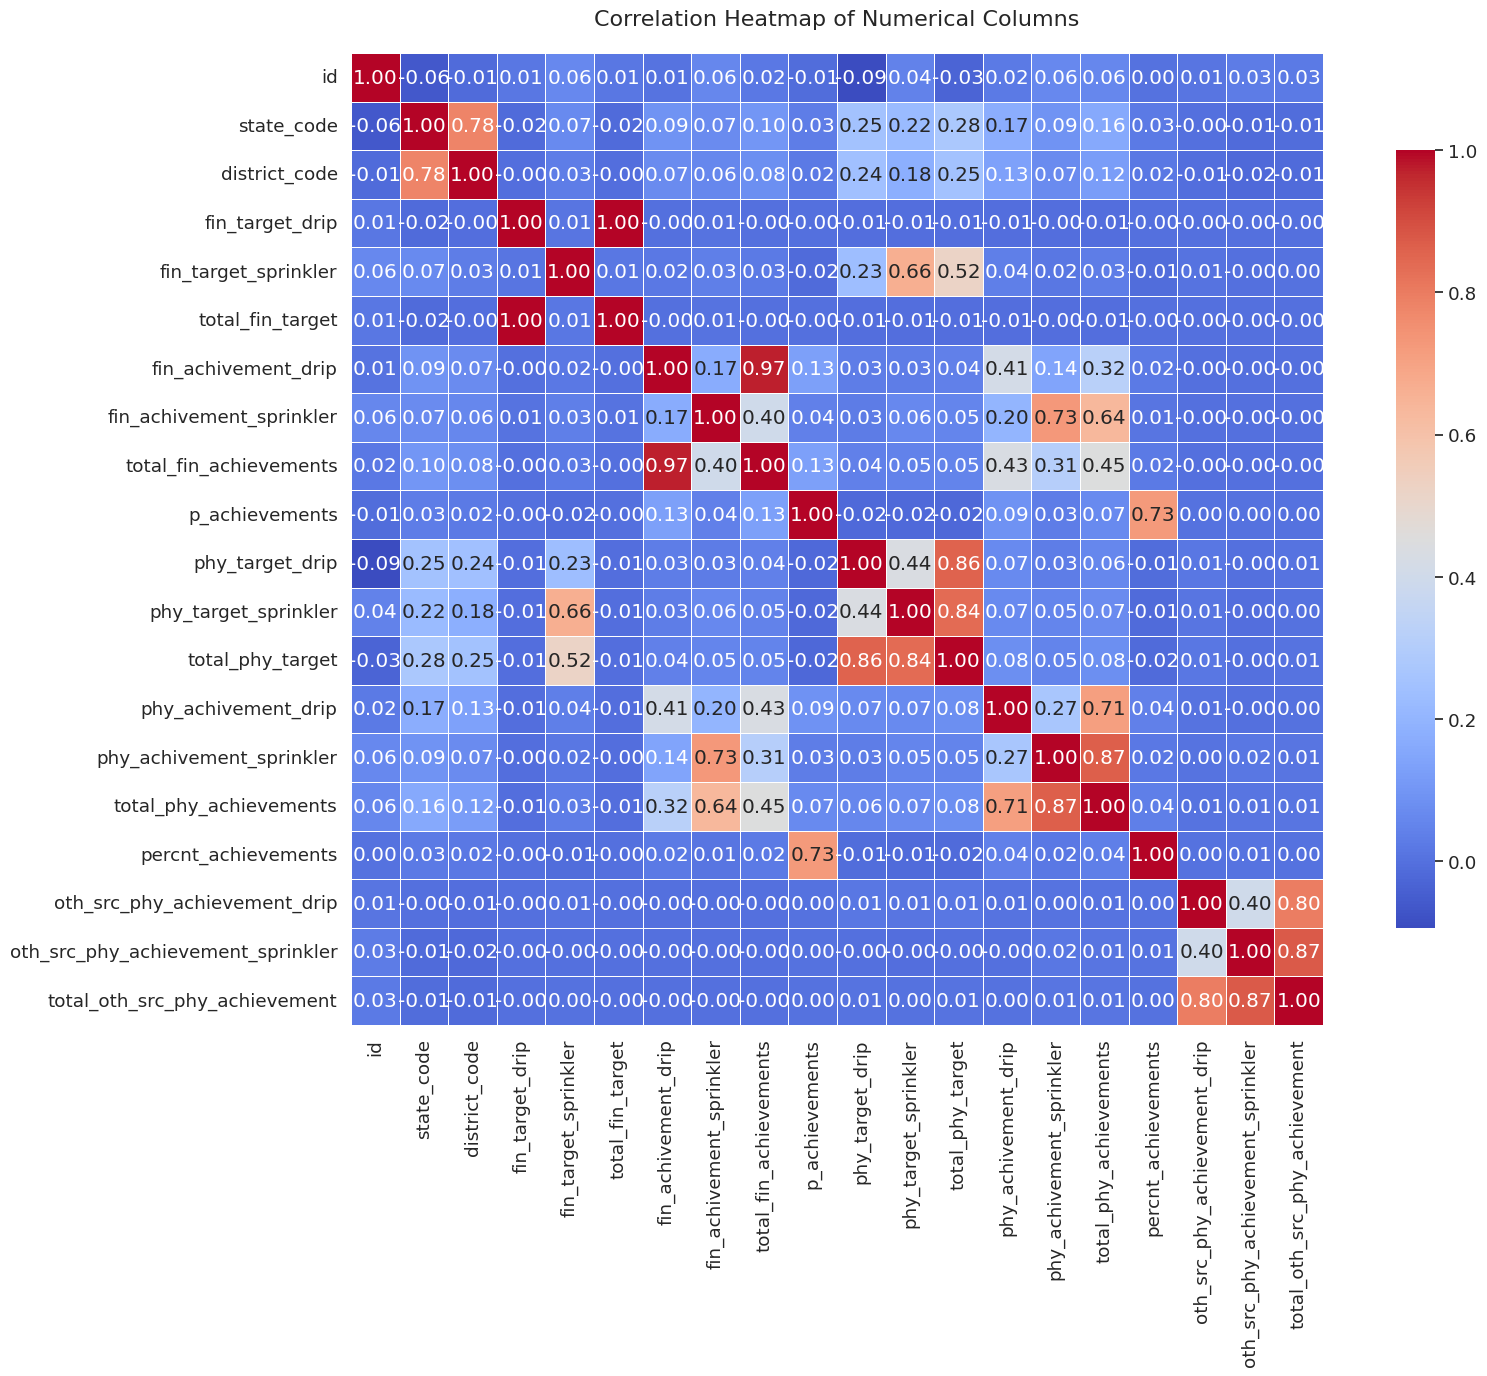

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(18, 14))
sns.set(font_scale=1.2)
corr_matrix = df[num_cols].corr()
heatmap = sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    square=True,
    linewidths=0.5,
    cbar_kws={'shrink': 0.8}
)
plt.title("Correlation Heatmap of Numerical Columns", fontsize=16, pad=20)
plt.tight_layout()
plt.show()

/tmp/ipython-input-10-2153075312.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_districts.values, y=top_districts.index, palette='crest')


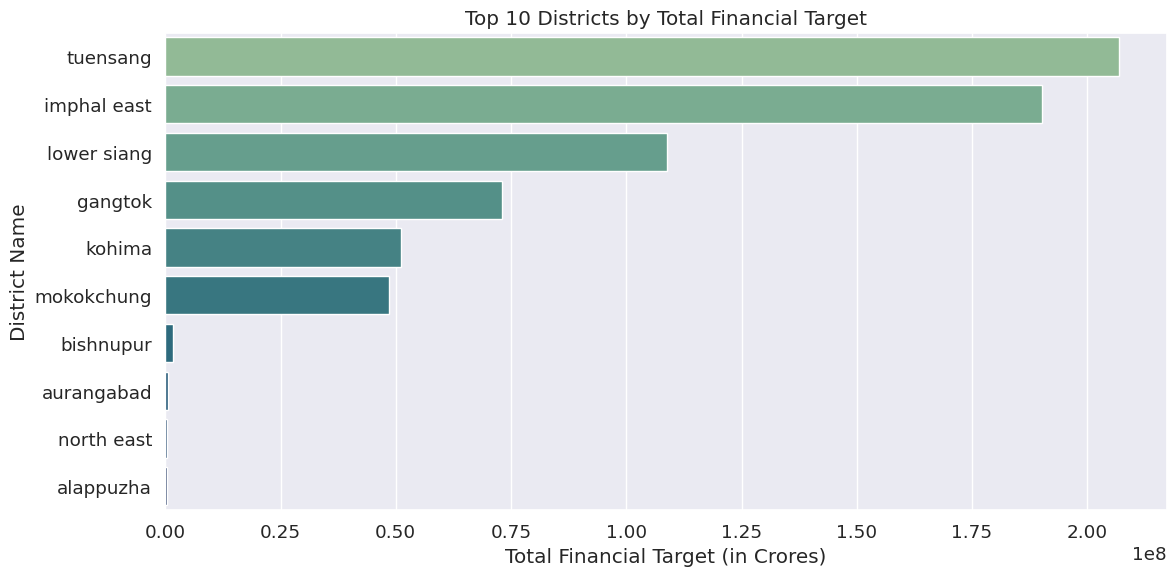

In [ ]:
top_districts = df.groupby('district_name')['total_fin_target'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_districts.values, y=top_districts.index, palette='crest')
plt.title("Top 10 Districts by Total Financial Target")
plt.xlabel("Total Financial Target (in Crores)")
plt.ylabel("District Name")
plt.tight_layout()
plt.show()

/tmp/ipython-input-11-235533846.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_achievement.values, y=avg_achievement.index, palette='viridis')


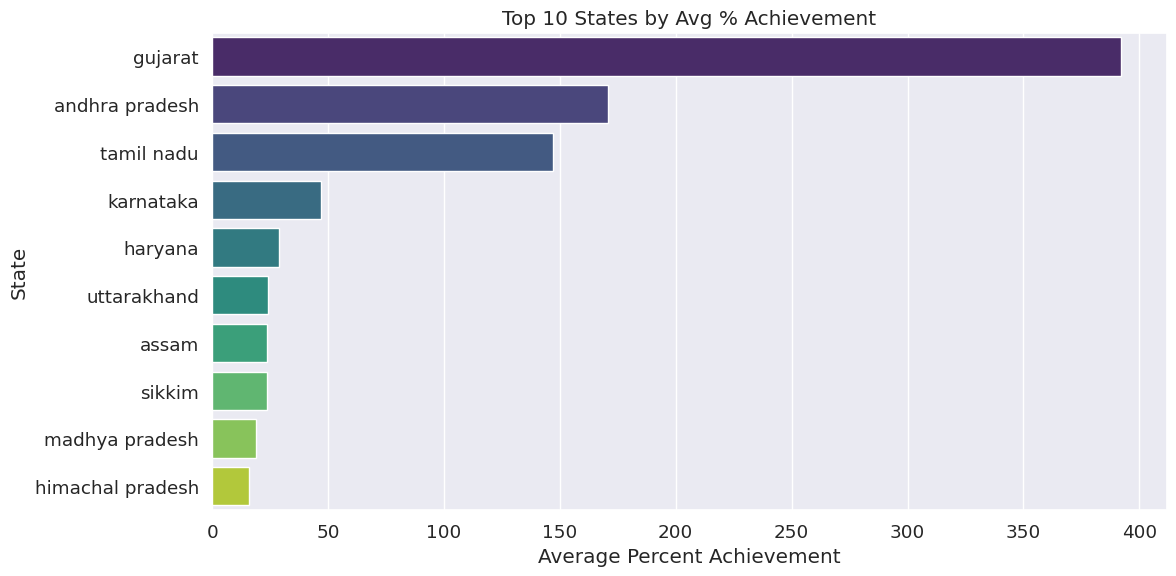

In [ ]:
avg_achievement = df.groupby('state_name')['percnt_achievements'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_achievement.values, y=avg_achievement.index, palette='viridis')
plt.title("Top 10 States by Avg % Achievement")
plt.xlabel("Average Percent Achievement")
plt.ylabel("State")
plt.tight_layout()
plt.show()

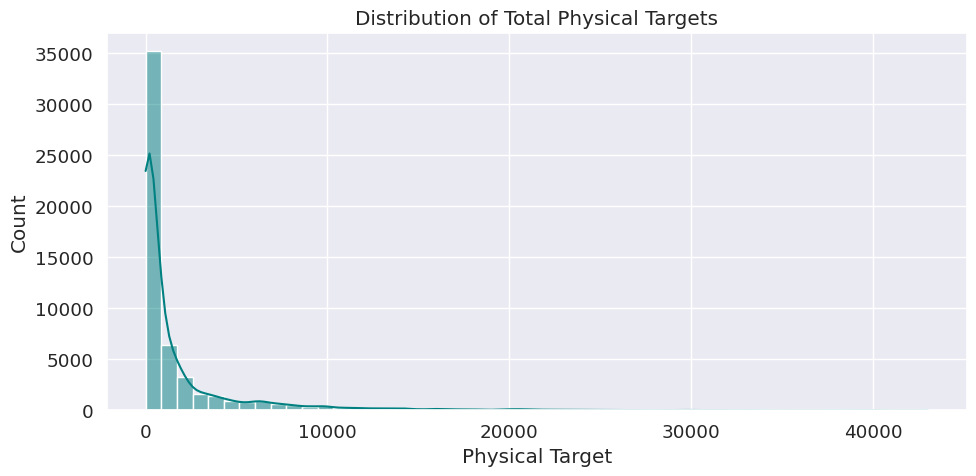

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(df['total_phy_target'], bins=50, kde=True, color='teal')
plt.title("Distribution of Total Physical Targets")
plt.xlabel("Physical Target")
plt.tight_layout()
plt.show()

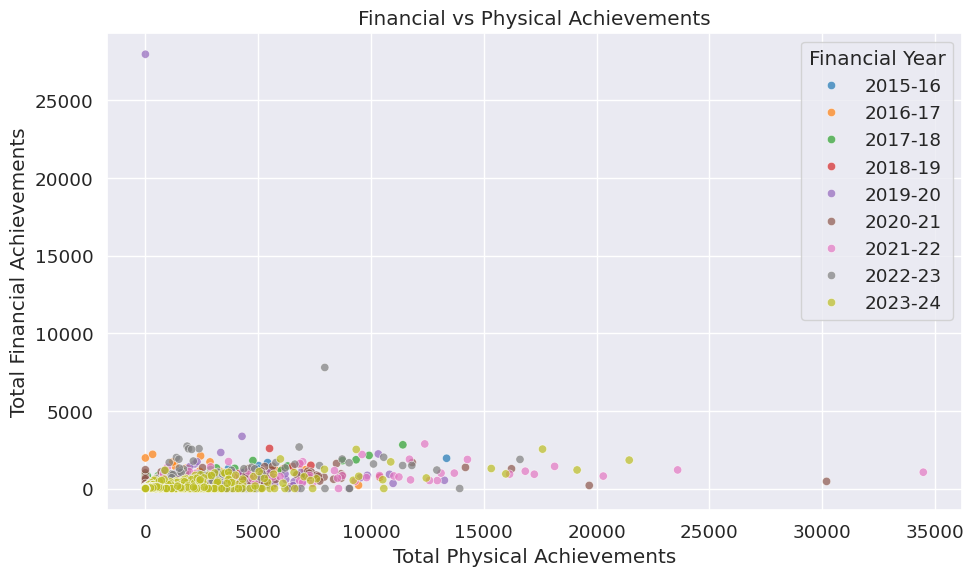

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='total_phy_achievements',
    y='total_fin_achievements',
    hue='fin_year',
    palette='tab10',
    alpha=0.7
)
plt.title("Financial vs Physical Achievements")
plt.xlabel("Total Physical Achievements")
plt.ylabel("Total Financial Achievements")
plt.legend(title='Financial Year')
plt.tight_layout()
plt.show()

/tmp/ipython-input-29-4241519027.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='fin_year', y='percnt_achievements', palette='pastel')


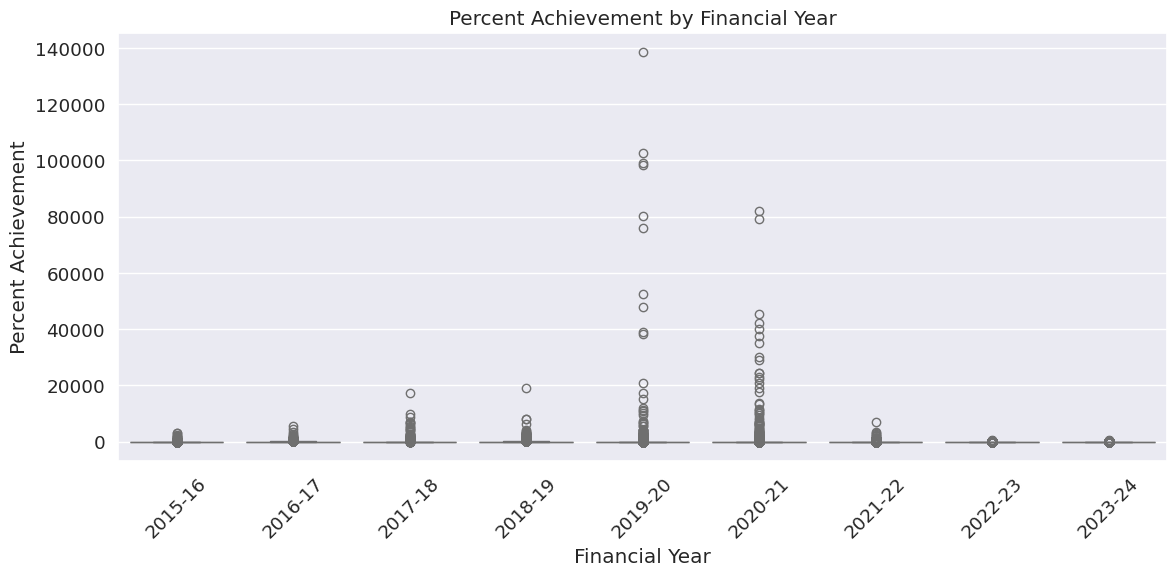

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='fin_year', y='percnt_achievements', palette='pastel')
plt.title("Percent Achievement by Financial Year")
plt.xlabel("Financial Year")
plt.ylabel("Percent Achievement")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()